In [17]:
#conda install -c conda-forge fbprophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/dacatay/time-series-analysis/master/data/passengers.csv', sep=';', header=0, parse_dates=True)
df.tail(10)


,month,n_passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [19]:
# create new coumns, specific headers needed for Prophet
df['ds'] = df['month']
df['y'] = pd.DataFrame(df['n_passengers'])
df.pop('month')
df.pop('n_passengers')

0      112
1      118
2      132
3      129
4      121
5      135
6      148
7      148
8      136
9      119
10     104
11     118
12     115
13     126
14     141
15     135
16     125
17     149
18     170
19     170
20     158
21     133
22     114
23     140
24     145
25     150
26     178
27     163
28     172
29     178
      ... 
114    491
115    505
116    404
117    359
118    310
119    337
120    360
121    342
122    406
123    396
124    420
125    472
126    548
127    559
128    463
129    407
130    362
131    405
132    417
133    391
134    419
135    461
136    472
137    535
138    622
139    606
140    508
141    461
142    390
143    432
Name: n_passengers, Length: 144, dtype: int64

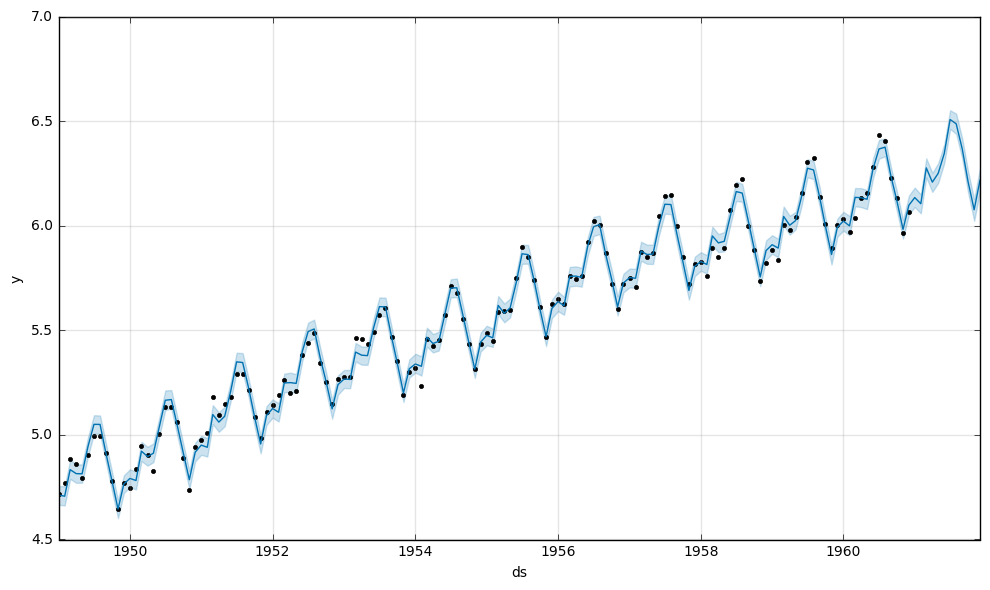

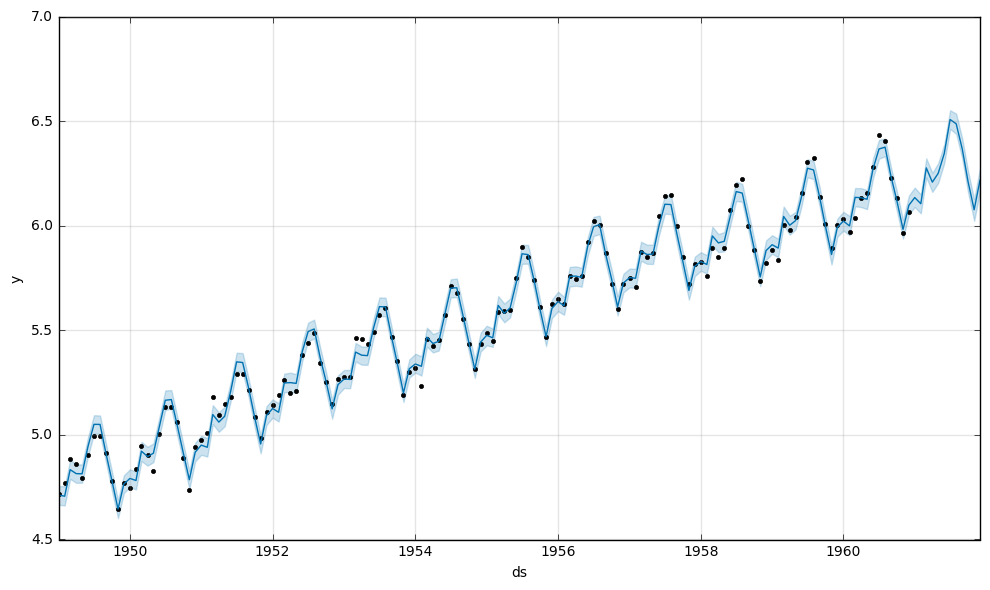

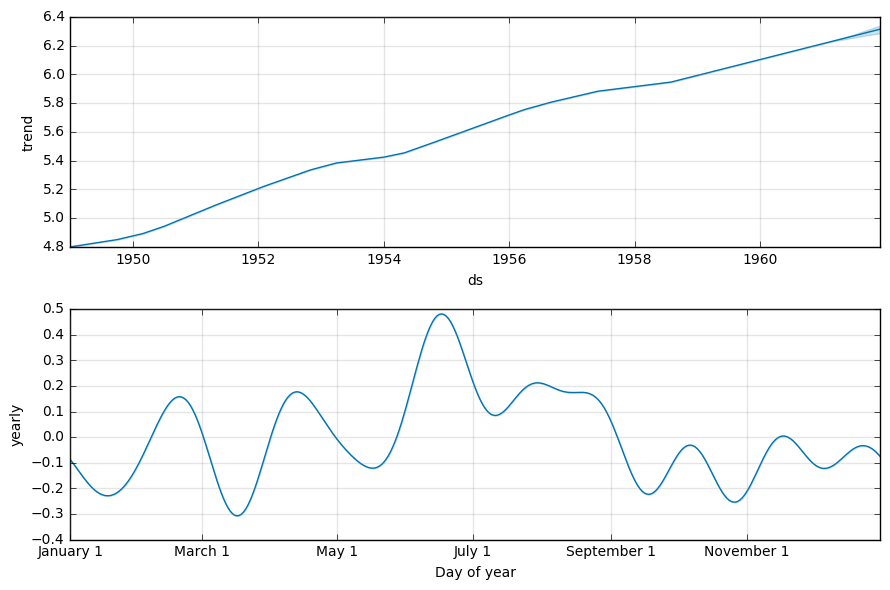

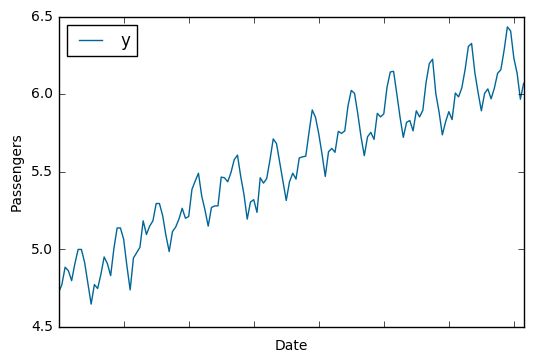

In [20]:
# taking log transform to make it additive . Prophet requires additive.
df['y'] = pd.DataFrame(np.log(df['y']))
 
# plot data
ax = df.set_index('ds').plot(color='#006699');
ax.set_ylabel('Passengers');
ax.set_xlabel('Date');
plt.savefig('passenger.png')
plt.show()

In [39]:
################################### Testing for accuracy ##############################################
df_train = df[df['ds'] <= '1958-12']
df_train

,ds,y
0,1949-01,4.718499
1,1949-02,4.770685
2,1949-03,4.882802
3,1949-04,4.859812
4,1949-05,4.795791
5,1949-06,4.905275
6,1949-07,4.997212
7,1949-08,4.997212
8,1949-09,4.912655
9,1949-10,4.779123


In [40]:
# Prophet assumes an additive model and thus we need to log transform our input data
m = Prophet()
m.fit(df_train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\X38753A\AppData\Local\Continuum\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [75]:
future_new = m.make_future_dataframe(periods=12,freq='M')
future_new


,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
5,1949-06-01
6,1949-07-01
7,1949-08-01
8,1949-09-01
9,1949-10-01


In [43]:
forecast_new = m.predict(future_new)
forecast_new[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
#print(forecast)

C:\Users\X38753A\AppData\Local\Continuum\Anaconda3\lib\site-packages\fbprophet\forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
C:\Users\X38753A\AppData\Local\Continuum\Anaconda3\lib\site-packages\fbprophet\forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,4.717716,4.671290,4.758439
1,1949-02-01,4.709021,4.667584,4.751728
2,1949-03-01,4.856963,4.816945,4.899647
3,1949-04-01,4.820309,4.776705,4.866402
4,1949-05-01,4.811495,4.771281,4.856948
5,1949-06-01,4.947655,4.902718,4.991855
6,1949-07-01,5.038901,4.996253,5.084059
7,1949-08-01,5.042184,4.999963,5.082682
8,1949-09-01,4.907326,4.865422,4.952412
9,1949-10-01,4.775970,4.736165,4.820448


In [45]:
one_year_output =forecast_new[forecast_new['ds'] >= '1959-01-31']

In [52]:
one_year_actual = df[(df['ds'] >= '1959-01') & (df['ds'] <= '1959-11')]

In [59]:
one_year_output['yhat'] = np.exp(one_year_output['yhat'])

C:\Users\X38753A\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
one_year_actual['y'] = np.exp(one_year_actual['y'])

C:\Users\X38753A\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
one_year_actual['y']

120    360.0
121    342.0
122    406.0
123    396.0
124    420.0
125    472.0
126    548.0
127    559.0
128    463.0
129    407.0
130    362.0
Name: y, dtype: float64

In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(one_year_actual['y'], one_year_output['yhat'])
rmse = np.sqrt(mse)

In [64]:
print(rmse)

58.23597112152375


In [73]:
#mape 
mape = np.mean(np.abs((one_year_actual['y'] - one_year_output['yhat'])/one_year_actual['y']))


In [74]:
mape = mape*100
accuracy = 100- mape
print(accuracy)

94.12048181715765
